In [1]:
# The dataset was taken from https://www.kaggle.com/asifraza14/laptop-price-prediction-using-specifications
# Perform some basic EDA and Data Cleaning
# Build a simple RandomForestRegressor for predicting the laptops prices

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re

In [3]:
laptop = pd.read_csv("C:/Users/User/Desktop/DS/Datasets/Laptop_prices/laptop_price.csv")

In [4]:
laptop.head()

,Unnamed: 0,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


# Data Cleaning

In [5]:
laptop.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
laptop.head()

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


In [7]:
df = laptop.copy()

In [8]:
df.head()

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


In [9]:
# remove the , and rupee sign from Price

In [10]:
laptop["Price"] = laptop["Price"].str.replace(',','')
laptop["Price"] = laptop["Price"].str.replace('₹','')


In [11]:
laptop.head()

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,43990,3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,43990,4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,31490,4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,40990,4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,27490,4.1


In [12]:
laptop.isnull().sum()

Name                0
Processor           0
RAM                 0
Operating System    0
Storage             0
Display             0
Warranty            0
Price               0
rating              0
dtype: int64

In [13]:
laptop["Operating System"].unique()

array(['64 bit Windows 10 Operating System', 'Mac OS Operating System',
       'Windows 10 Operating System',
       'Pre-installed Genuine Windows 10 Operating System (Includes Built-in Security, Free Automated Updates, Latest Features)',
       'DOS Operating System', '64 bit Chrome Operating System'],
      dtype=object)

In [14]:
laptop.rating.unique()

array([3.9, 4.2, 4.6, 4.1, 4.5, 4.4, 4.3, 5. , 4. , 2. , 3. , 3.4, 4.7,
       3.8, 4.8, 3.6, 3.5, 1. , 3.7, 3.3, 4.9])

In [15]:
# as the OS is mainly Windows and the rating varies from 1 to 5, I consider them usless for the further analysis

In [16]:
laptop.drop(["Operating System","rating"],axis=1,inplace=True)

In [17]:
# formating Warranty
laptop.Warranty = laptop.Warranty.str.replace("\s.*","")

<ipython-input-17-ad1c9b14b703>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop.Warranty = laptop.Warranty.str.replace("\s.*","")


In [18]:
laptop.head()

,Name,Processor,RAM,Storage,Display,Warranty,Price
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,1 TB HDD,39.62 cm (15.6 inch) Display,1,43990
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,35.56 cm (14 Inch) Display,1,43990
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,256 GB SSD,35.56 cm (14 inch) Display,1,31490
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,35.56 cm (14 inch) Display,1,40990
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,39.62 cm (15.6 inch) Display,1,27490


In [19]:
# formating RAM

laptop.RAM = laptop.RAM.str.replace("\s.*","")

<ipython-input-19-f30bd5098ccd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop.RAM = laptop.RAM.str.replace("\s.*","")


In [20]:
# replace 1 TB to 1024 GB

laptop.Storage = laptop.Storage.str.replace("1 TB","1024 GB")

In [21]:
laptop.head()

,Name,Processor,RAM,Storage,Display,Warranty,Price
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,1024 GB HDD,39.62 cm (15.6 inch) Display,1,43990
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 Inch) Display,1,43990
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,256 GB SSD,35.56 cm (14 inch) Display,1,31490
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,256 GB SSD,35.56 cm (14 inch) Display,1,40990
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,1024 GB HDD,39.62 cm (15.6 inch) Display,1,27490


In [22]:
laptop.Price = laptop.Price.astype(str).astype(int)
print(laptop.dtypes)

Name         object
Processor    object
RAM          object
Storage      object
Display      object
Warranty     object
Price         int32
dtype: object


# Encoding

In [23]:
col = [predict for predict in laptop.columns if laptop[predict].dtype == "O"]

for predict in col:
    labels_order = laptop.groupby([predict])["Price"].mean().sort_values().index
    labels_order = {k:v for v,k in enumerate(labels_order,0)}
    laptop[predict] = laptop[predict].map(labels_order)

laptop.head(7)

,Name,Processor,RAM,Storage,Display,Warranty,Price
0,67,24,1,4,13,3,43990
1,68,14,1,8,20,3,43990
2,17,0,1,8,16,3,31490
3,48,14,1,8,16,3,40990
4,7,30,0,4,13,3,27490
5,61,24,1,4,13,3,42990
6,93,13,1,4,13,3,50990


In [24]:
target = laptop["Price"]
features = laptop.drop(columns="Price")

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Split the Data and Build the Model

In [26]:
scaler = StandardScaler()

features = scaler.fit_transform(features)

In [27]:
features

array([[-1.11823736,  0.48947773, -0.44234017, -1.11928858, -0.53705835,
        -0.0650044 ],
       [-1.10897402, -1.05594564, -0.44234017,  1.21477292,  1.33414042,
        -0.0650044 ],
       [-1.58140463, -3.21953835, -0.44234017,  1.21477292,  0.26488398,
        -0.0650044 ],
       ...,
       [ 1.02159541, -0.59231863, -1.336778  , -1.70280396, -0.26974424,
        -0.0650044 ],
       [ 1.18833562,  2.18944343,  1.34653551, -0.53577321, -0.53705835,
        -0.0650044 ],
       [ 0.43800465,  0.48947773,  0.45209767,  0.04774217,  0.26488398,
        -0.0650044 ]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=.3,random_state=50,shuffle=True)

In [29]:
model = RandomForestRegressor(random_state=10)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [30]:
# Check accuracy

In [31]:
print("Train accuracy")
print(model.score(X_train,y_train))

Train accuracy
0.9976233393719107


In [32]:
print('Test accuracy')
print(model.score(X_test,y_test))

Test accuracy
0.9916261949185583


In [33]:
prediction = model.predict(X_test)

In [34]:
# EDA

In [35]:
df.head()

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1


In [36]:
import seaborn as sns

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '8 GB DDR4 RAM'),
  Text(1, 0, '4 GB DDR4 RAM'),
  Text(2, 0, '16 GB DDR4 RAM'),
  Text(3, 0, '8 GB LPDDR4X RAM'),
  Text(4, 0, '8 GB LPDDR3 RAM'),
  Text(5, 0, '32 GB LPDDR4X RAM'),
  Text(6, 0, '16 GB LPDDR4X RAM'),
  Text(7, 0, '16 GB LPDDR3 RAM'),
  Text(8, 0, '8 GB DDR3 RAM'),
  Text(9, 0, '16 GB DDR3 RAM'),
  Text(10, 0, '32 GB DDR4 RAM'),
  Text(11, 0, 'Upgradable SSD Upto 512 GB and RAM Upto 32 GB'),
  Text(12, 0, '4 GB DDR3 RAM'),
  Text(13, 0, '12 GB DDR4 RAM')])

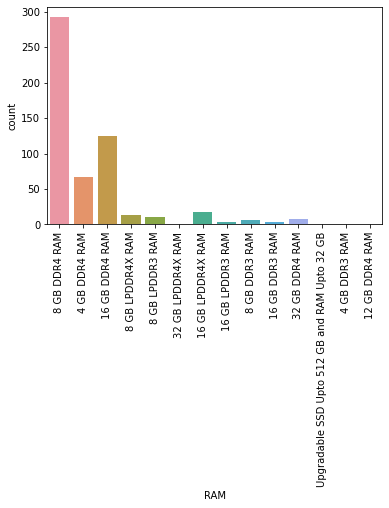

In [37]:
sns.countplot(df["RAM"])
plt.xticks(rotation=90)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '1 TB HDD'),
  Text(1, 0, '256 GB SSD'),
  Text(2, 0, '1 TB HDD|256 GB SSD'),
  Text(3, 0, '512 GB SSD'),
  Text(4, 0, '1 TB SSD'),
  Text(5, 0, 'M.2 Slot for SSD Upgrade'),
  Text(6, 0, '128 GB NVMe PCIe 3.0 x4 SSD'),
  Text(7, 0, '1 TB HDD|128 GB SSD'),
  Text(8, 0, '128 GB SSD'),
  Text(9, 0, '512 GB SSD for Reduced Boot Up Time and in Game Loading'),
  Text(10, 0, '1 TB HDD|512 GB SSD'),
  Text(11, 0, '128 GB SSD for Reduced Boot Up Time and in Game Loading'),
  Text(12, 0, '512 GB HDD|512 GB SSD')])

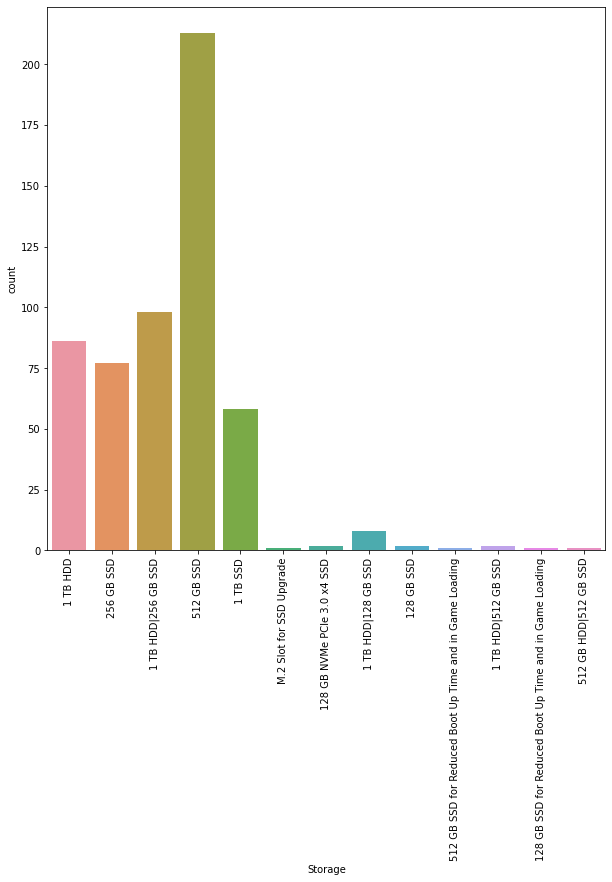

In [38]:
plt.figure(figsize=(10,10))
sns.countplot(df['Storage'])
plt.xticks(rotation=90)

<AxesSubplot:>

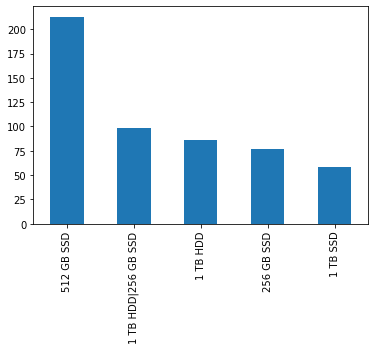

In [39]:
df['Storage'].value_counts()[:5].plot(kind='bar')

{'whiskers': [<matplotlib.lines.Line2D at 0x2096a572820>,
 'caps': [<matplotlib.lines.Line2D at 0x2096a572ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2096a5724c0>],
 'medians': [<matplotlib.lines.Line2D at 0x2096a5815e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2096a581940>],
 'means': []}

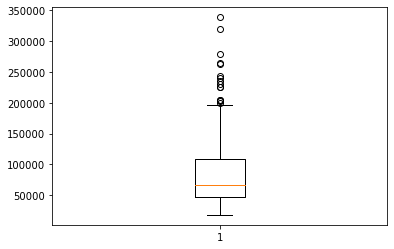

In [40]:
plt.boxplot(laptop.Price)

{'whiskers': [<matplotlib.lines.Line2D at 0x2096a54d9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2096a59dc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2096a54d670>],
 'medians': [<matplotlib.lines.Line2D at 0x2096a5a6bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2096a5ae9a0>],
 'means': []}

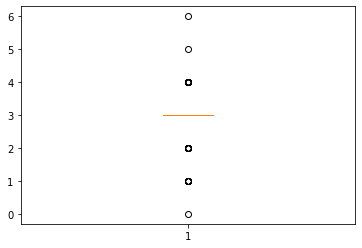

In [41]:
plt.boxplot(laptop.Warranty)

<AxesSubplot:ylabel='Name'>

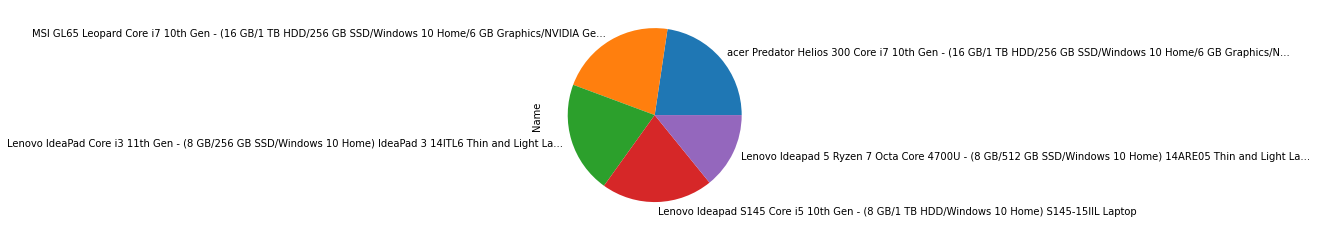

In [42]:
df['Name'].value_counts()[:5].plot(kind="pie")